#### Problem Set 1 - due 10/10 - Julián Ferreiro (NetID:jif245)

#### Problem Identification
The problem that guided the following analysis was if the presence of homeless people correlate with instances of crimes in the city of New York.

Homeless people have been asociated with increased chance of criminal activity (Greenberg 2008, Cronley 2015) in the literature, but also with greater exposure to victimization (Tyler 2010). 

311 data contains two type of complaints referred to homelesness, i.e. "Homeless Person Assistance" and "Homeless Encampment".
For the purpose of this assignment, "Homeless Encampment" was the one taken into account. It was considered to be a better indication of a more permanent residence of a homeless person.

This data was compared with 911 felonies, misdemeanor and violations complaints calls and 911 seven major crimes statistics for 2016. 

Due to the technical limitations of the signer of this document, data was only aggregated by precinct and by date of the year for comparison. 

Note: All of the analysis where performed using jupyter notebooks 5.0.0 by virtue of Anaconda Navigator Version 1.6.2.
All of the datasets where downloaded and analysed locally. 

In [345]:
#The following packages are used in the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import statsmodels.formula.api as smf
from datetime import datetime

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Homelessness by Borough
For the first part of the analysis of the data, the amount of homeless encampments by borough was analysed

In [457]:
#The 311 Complaint data for 2016
df_311_full=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [493]:
#The 311 Complaint data for 2016
c_311 = pd.DataFrame(pd.value_counts(df_311_full['Borough']).reset_index())
c_311.columns = ['BORO_NM', 'complaint_c']
pd.DataFrame(c_311)

,BORO_NM,complaint_c
0,BROOKLYN,701245
1,QUEENS,520216
2,MANHATTAN,516768
3,BRONX,435437
4,STATEN ISLAND,108190
5,Unspecified,84329


**Table 1**. Amount of 311 Complaints by Borough

This data will only be used to normalize the Homeless Encampments

In [407]:
#This filtered data contains only the Homeless Encampments for the year 2016
df_311=pd.read_csv("Homeless_Encampments.csv")

In [20]:
#This filtered data all NYPD complaints for the year 2016
df_911=pd.read_csv("NYPD_Complaint_Data_Historic.csv")

In [21]:
#The 911 dataset is filtered with only the following columns:
df_911=df_911[['BORO_NM',"ADDR_PCT_CD","OFNS_DESC","PD_DESC","PREM_TYP_DESC","CMPLNT_NUM","LAW_CAT_CD",'CMPLNT_FR_DT']]

The columns relevant to the analysis are:

**CMPLNT_FR_DT**, Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)

**BORO_NM**, The name of the borough in which the incident occurred

**ADDR_PCT_CD**, The precinct in which the incident occurred	

**LAW_CAT_CD**, Level of offense: felony, misdemeanor, violation

In [496]:
#This are the total number of complains by borough for 911 data:
c_911_borough=pd.value_counts(df_911['BORO_NM'], sort=False)
print c_911_borough

MANHATTAN        112919
QUEENS            92392
BROOKLYN         137851
BRONX            103750
STATEN ISLAND     21378
Name: BORO_NM, dtype: int64


**Table 2**. Amount of 911 Complaints by Borough

In [25]:
#The 311 dataset is filtered with only the following columns:
df_311=df_311[['Created Date','Borough', 'Location Type']]

The columns relevant to the analysis are:

**Created Date**, Date of Complaint

**Borough**, The name of the borough in which the incident occurred

In [497]:
#Counting homeless encampments by borough and converting it to a dataframe for later analysis.
home_count = pd.DataFrame(pd.value_counts(df_311['Borough']).reset_index())
home_count.columns = ['BORO_NM', 'Home_c']
print(home_count)

         BORO_NM  Home_c
0      MANHATTAN    3379
1       BROOKLYN     895
2         QUEENS     545
3          BRONX     299
4  STATEN ISLAND      56


**Table 3**. Amount of 311 Homeless Encampments by Borough

In [125]:
#The amount of Homeless Encampments is normalized by the amount of total complaints by borough
home_c = pd.merge(norm_count, c_311, on='BORO_NM')
home_c["norm_c"]=home_c["Home_c"]/home_c["complaint_c"]
home_c

,BORO_NM,Home_c,complaint_c,norm_c
0,MANHATTAN,3379,516768,0.006539
1,BROOKLYN,895,701245,0.001276
2,QUEENS,545,520216,0.001048
3,BRONX,299,435437,0.000687
4,STATEN ISLAND,56,108190,0.000518


**Table 4**. 311 Homeless Encampments by Borough, Total number of Complaints and Normalized Count

In [132]:
#Visualizing the levels of offense by borough
pd.crosstab(df_911['BORO_NM'],df_911["LAW_CAT_CD"])

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
BORO_NM,,,
BRONX,29397,59694,14659
BROOKLYN,44553,73128,20170
MANHATTAN,34899,64772,13248
QUEENS,30818,48076,13498
STATEN ISLAND,5051,12002,4325


**Table 5**. 911 Levels of offense by Borough

In [232]:
#here another normalization is done. The specific level of offense by the total amounts of complaints per borough 
c_911_norm=pd.crosstab(df_911['BORO_NM'],df_911["LAW_CAT_CD"]).apply(lambda r: r/r.sum(), axis=1)

In [204]:
#For reasons that I cannot explain, exporting a csv and opening a csv of a crosstab makes 
#the format of the table much easier to work with. Since is not necessary to execute the code
#once the file is created, I leave it commented. 

#c_911_norm.to_csv("c_911_norm.csv")
#c_911_norm=pd.read_csv("c_911_norm.csv")

In [210]:
c_911_norm

,BORO_NM,FELONY,MISDEMEANOR,VIOLATION
0,BRONX,0.283345,0.575364,0.141292
1,BROOKLYN,0.323197,0.530486,0.146317
2,MANHATTAN,0.309062,0.573615,0.117323
3,QUEENS,0.333557,0.520348,0.146095
4,STATEN ISLAND,0.236271,0.561418,0.202311


**Table 6**. 911 Levels of offense by Borough Normalized Count

In [501]:
#Merging Homeless Encampments and offense type
c_all=pd.merge(home_c, c_911_norm, on='BORO_NM')


In [502]:
c_all

,BORO_NM,Home_c,complaint_c,norm_c,FELONY,MISDEMEANOR,VIOLATION
0,MANHATTAN,3379,516768,0.006539,0.309062,0.573615,0.117323
1,BROOKLYN,895,701245,0.001276,0.323197,0.530486,0.146317
2,QUEENS,545,520216,0.001048,0.333557,0.520348,0.146095
3,BRONX,299,435437,0.000687,0.283345,0.575364,0.141292
4,STATEN ISLAND,56,108190,0.000518,0.236271,0.561418,0.202311


**Table 7**. Merged table by Borough

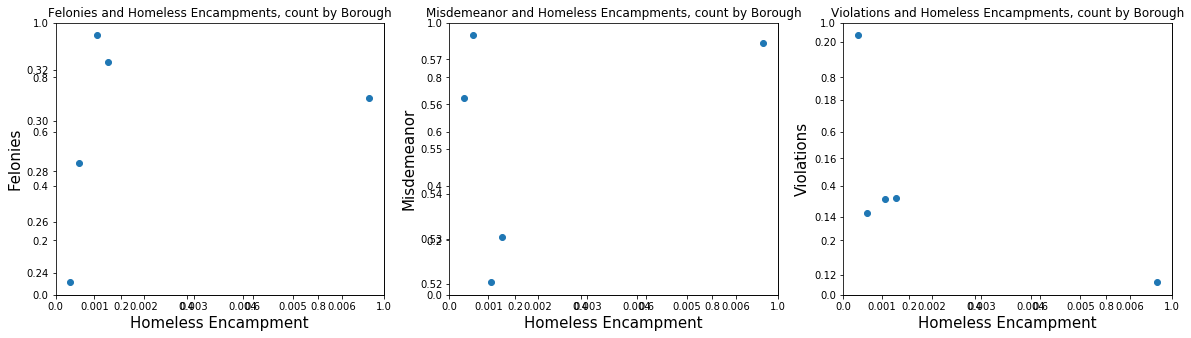

In [555]:
#create a figure object
fig = pl.figure()
fig, axs = plt.subplots(1,3,figsize=(20,5))

#populate it with subplots as axis objects
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(c_all["norm_c"],c_all["FELONY"], "o", label = "Felonies")
ax1.set_xlabel("Homeless Encampment", fontsize = 15)
ax1.set_ylabel("Felonies", fontsize = 15)

ax1.set_title('Felonies and Homeless Encampments, count by Borough')

ax2.plot(c_all["norm_c"],c_all["MISDEMEANOR"], "o")
ax2.set_xlabel("Homeless Encampment", fontsize = 15)
ax2.set_ylabel("Misdemeanor", fontsize = 15)

ax2.set_title('Misdemeanor and Homeless Encampments, count by Borough')

ax3.plot(c_all["norm_c"],c_all["VIOLATION"], "o")
ax3.set_xlabel("Homeless Encampment", fontsize = 15)
ax3.set_ylabel("Violations", fontsize = 15);

ax3.set_title('Violations and Homeless Encampments, count by Borough')



**Figure 1.** Different Level of ofenses and Homeless Encampments. Five points is not enough to make a correlation. Anyway we can observer that Manattan is a very extreme case, it has the most Homeless Encampments even after normalization.

Due to Manhattan's extreme nature (it has the highest amount of Homeless Encampments complaints per total complaints), the following analysis was continued only in that Borough

In [252]:
#Converting Date to datetime
df_311["Created Date"]=pd.to_datetime(df_311["Created Date"])

C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Converting Date to datetime
df_911["CMPLNT_FR_DT"]=pd.to_datetime(df_911["CMPLNT_FR_DT"])

In [265]:
#Creating a 311 Data Frame with only Manhattan's complaints
df311_man=df_311[df_311["Borough"]=="MANHATTAN"]

In [ ]:
#Creating a 911 Data Frame with only Manhattan's complaints
df911_man=df_911[df_911["BORO_NM"]=="MANHATTAN"]


In [ ]:
#A table count of Homeless encampments is created
home_man_count=pd.DataFrame(pd.value_counts(df311_man["Created Date"].dt.month)).reset_index()
home_man_count.columns = ['Month', 'H_Encampment']
print(home_man_count)

In [ ]:
#Table counts of offenses
mis_man_count = pd.DataFrame(pd.value_counts(df911_man["CMPLNT_FR_DT"].dt.month[df911_man["LAW_CAT_CD"]=="MISDEMEANOR"]).reset_index())
mis_man_count.columns = ['Month', 'Misdemeanor']

fel_man_count = pd.DataFrame(pd.value_counts(df911_man["CMPLNT_FR_DT"].dt.month[df911_man["LAW_CAT_CD"]=="FELONY"]).reset_index())
fel_man_count.columns = ['Month', 'Felonies']

vio_man_count = pd.DataFrame(pd.value_counts(df911_man["CMPLNT_FR_DT"].dt.month[df911_man["LAW_CAT_CD"]=="VIOLATION"]).reset_index())
vio_man_count.columns = ['Month', 'Violations']


In [585]:
#Merging all the count tables in one
c_man_all=pd.merge(home_man_count, fel_man_count, on="Month")
c_man_all=pd.merge(c_man_all, mis_man_count, on="Month")
c_man_all=pd.merge(c_man_all, vio_man_count, on="Month")
c_man_all

,Month,H_Encampment,Felonies,Misdemeanor,Violations
0,8,500,3219,5976,1247
1,9,417,2869,5287,1117
2,7,388,3166,5507,1100
3,10,336,3068,5482,1153
4,6,336,3082,5851,1185
5,5,285,2964,5708,1200
6,3,228,2968,5580,1155
7,4,211,2872,5697,1110
8,11,205,2684,4850,1045
9,12,170,2661,4793,948


**Table 8**. Merged table by month

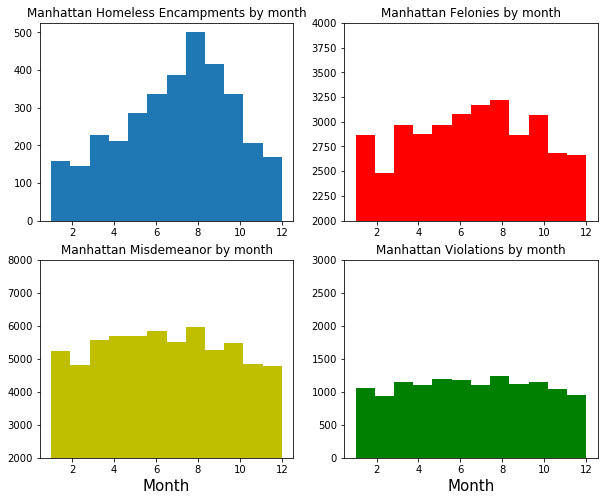

In [595]:
#create a figure object
fig2 = pl.figure()

fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,8))

ax1.hist(df311_man["Created Date"].dt.month, bins=12)
ax2.hist(df911_man["CMPLNT_FR_DT"].dt.month[df911_man["LAW_CAT_CD"]=="FELONY"],bins=12, color="r")
ax3.hist(df911_man["CMPLNT_FR_DT"].dt.month[df911_man["LAW_CAT_CD"]=="MISDEMEANOR"],bins=12, color="y")
ax4.hist(df911_man["CMPLNT_FR_DT"].dt.month[df911_man["LAW_CAT_CD"]=="VIOLATION"],bins=12, color="g");

ax3.set_xlabel("Month", fontsize = 15)
ax4.set_xlabel("Month", fontsize = 15)

ax1.set_title('Manhattan Homeless Encampments by month')
ax2.set_title('Manhattan Felonies by month')
ax2.set_ylim([2000,4000])
ax3.set_title('Manhattan Misdemeanor by month')
ax3.set_ylim([2000,8000])
ax4.set_title('Manhattan Violations by month')
ax4.set_ylim([0,3000]);


**Figure 2.** Histograms of type of offense and Homeless Encampments. 

The Homeless Encampments show a higher frequency in the warmer months. The 911 show a similar pattern but not as defined.

Although 12 points is not enough for a serious linear model, we can anyway try to see if there is any temporal correlation at the month level between homeless encampments and offenses.

In [587]:
#creating a linear model for Felonies
lm_fel = smf.ols(formula="Felonies~H_Encampment", data = c_man_all).fit()
lm_fel.summary()

#creating a linear model for Misdemeanor
lm_mis = smf.ols(formula="Misdemeanor~H_Encampment", data = c_man_all).fit()
lm_mis.summary()

#creating a linear model for violations
lm_vio = smf.ols(formula="Violations~H_Encampment", data = c_man_all).fit()
lm_vio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Violations   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     11.53
Date:                Mon, 09 Oct 2017   Prob (F-statistic):            0.00681
Time:                        17:38:00   Log-Likelihood:                -66.647
No. Observations:                  12   AIC:                             137.3
Df Residuals:                      10   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      931.1141     54.607     17.051      0.000     809.441    1052.787
H_Encampment     0.6140      0.181      3.396      0.007       0.211       1.017
==============================================================================
Omnibus:                        2.145   Durbin-Watson:                   1.150
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                0.924
Skew:                          -0.121   Prob(JB):                        0.630
Kurtosis:                       1.663   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Table 9**. Linear model for Violations against Homeless Encampments.

Violations and Homeless Encampments have a significant correlation, but that could be explained by the temperature during each month. During warmer months is easier to live in the streets and also more people are in the street with higher chance of them commiting violations. 
Similar findings for the other two offenses.

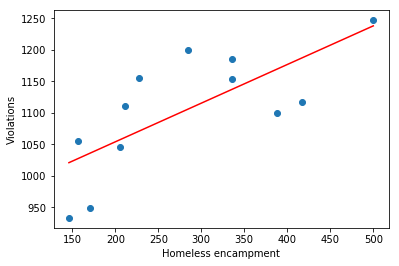

In [588]:
#Violations against Homeless Encampment
fig, ax = plt.subplots()
ax.scatter(c_man_all["H_Encampment"],c_man_all["Violations"])
plt.plot(c_man_all["H_Encampment"], c_man_all["H_Encampment"]*lm_vio.params[1] + lm_vio.params[0],c="r")
pl.ylabel("Violations");
pl.xlabel("Homeless encampment");


**Figure 3.** Linear fit and scatterplot of Homeless Encampments against Violations agreggating data by month.

The other types of offenses show a similar pattern. The higher the violations, the higher the Homeless Encampments.

To get better resolution, the data can be analysed by day instead of by month.

In [371]:
#Extracting date from Homeless Encampment
home_man_count_d=pd.DataFrame(pd.value_counts(df311_man["Created Date"].dt.strftime('%d-%m'))).reset_index()
home_man_count_d.columns = ['Date', 'H_Encampment']


In [427]:
#Extracting date from offenses
mis_man_count_d = pd.DataFrame(pd.value_counts(df911_man["CMPLNT_FR_DT"].dt.strftime('%d-%m')[df911_man["LAW_CAT_CD"]=="MISDEMEANOR"]).reset_index())
mis_man_count_d.columns = ['Date', 'Misdemeanor']

fel_man_count_d = pd.DataFrame(pd.value_counts(df911_man["CMPLNT_FR_DT"].dt.strftime('%d-%m')[df911_man["LAW_CAT_CD"]=="FELONY"]).reset_index())
fel_man_count_d.columns = ['Date', 'Felonies']

vio_man_count_d = pd.DataFrame(pd.value_counts(df911_man["CMPLNT_FR_DT"].dt.strftime('%d-%m')[df911_man["LAW_CAT_CD"]=="VIOLATION"]).reset_index())
vio_man_count_d.columns = ['Date', 'Violations']

In [410]:
#Merging coun tables
c_man_all_d=pd.merge(home_man_count_d, mis_man_count_d, on="Date")
c_man_all_d=pd.merge(c_man_all_d, fel_man_count_d, on="Date")
c_man_all_d=pd.merge(c_man_all_d, vio_man_count_d, on="Date")


In [596]:
#Creating linear models for violations against Homeless Encampments
lm_vio_d = smf.ols(formula="Violations~H_Encampment", data = c_man_all_d).fit()
lm_vio_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Violations   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     49.34
Date:                Mon, 09 Oct 2017   Prob (F-statistic):           1.10e-11
Time:                        17:49:48   Log-Likelihood:                -1208.6
No. Observations:                 358   AIC:                             2421.
Df Residuals:                     356   BIC:                             2429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       31.9115      0.745     42.811      0.000      30.446      33.377
H_Encampment     0.4793      0.068      7.024      0.000       0.345       0.614
==============================================================================
Omnibus:                        1.465   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                1.353
Skew:                           0.150   Prob(JB):                        0.508
Kurtosis:                       3.026   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Table 10**. linear models for violations against Homeless Encampments aggregated by date

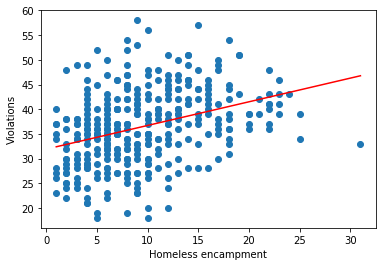

In [405]:
fig, ax = plt.subplots()
ax.scatter(c_man_all_d["H_Encampment"],c_man_all_d['Violations'])
plt.plot(c_man_all_d["H_Encampment"], c_man_all_d["H_Encampment"]*lm_vio_d.params[1] + lm_vio_d.params[0],c="r")
pl.ylabel('Violations');
pl.xlabel("Homeless encampment");

**Figure 4.** Linear fit and scatterplot of Homeless Encampments against Violations agreggating data by day

The other types of offenses show a similar pattern. The higher the violations, the higher the Homeless Encampments.
In this case the correlation is not as strong.
A complaint on homeless Encampment doesn't correlate strongly with a complaint of any type violation/misdemeanor/felony.

If crime and homeless encampments are related, the time span should be more than a single day.

### Spatial Correlation
Due to technical technical inability, the only type of spatial correlation that could be performed was aggregating data across precint.

Offense type are already characterized by precint, but Homeless Encampment aren't. 

To solve this, the site Carto was used with the function "Intersect Second Layer" in "Analysis". A Shape File of the NYPD Precincts and the Homeless shelteres with their Latitude and Longitude was used.

This creates two new columns in the data set with the counts and density counts of the variable (homeless Encampments) aggregated by precinct. This new data set was loaded in ipython for future analysis.


In [430]:
#Loading Homeless Encampment by precinct
prec_home_c=pd.read_csv("Counts per precinct.csv")
prec_home_c.columns

Index([u'Precinct', u'Homeless_Encampment_Count'], dtype='object')

In [429]:
#Creating count tables of offenses by precinct
vio_prec_count = pd.DataFrame(pd.value_counts(df_911["ADDR_PCT_CD"][df_911["LAW_CAT_CD"]=="VIOLATION"]).reset_index())
vio_prec_count.columns = ['Precinct', 'Violation']

mis_prec_count = pd.DataFrame(pd.value_counts(df_911["ADDR_PCT_CD"][df_911["LAW_CAT_CD"]=="MISDEMEANOR"]).reset_index())
mis_prec_count.columns = ['Precinct', 'Misdemeanor']

fel_prec_count = pd.DataFrame(pd.value_counts(df_911["ADDR_PCT_CD"][df_911["LAW_CAT_CD"]=="FELONY"]).reset_index())
fel_prec_count.columns = ['Precinct', 'Felonies']

In [433]:
#Merging tables
prec_all=pd.merge(prec_home_c, vio_prec_count, on="Precinct")
prec_all=pd.merge(prec_all, mis_prec_count, on="Precinct")
prec_all=pd.merge(prec_all, fel_prec_count, on="Precinct")


In [627]:
#Some statistics of the precintcs
prec_all.describe()

,Precinct,Homeless_Encampment_Count,Violation,Misdemeanor,Felonies
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,63.324675,66.324675,855.844156,3346.389610,1879.454545
std,36.118388,105.719146,387.933495,1385.424647,809.040685
min,1.000000,3.000000,49.000000,190.000000,85.000000
25%,32.000000,20.000000,591.000000,2426.000000,1376.000000
50%,66.000000,31.000000,786.000000,3114.000000,1691.000000
75%,100.000000,56.000000,1041.000000,3943.000000,2334.000000
max,123.000000,686.000000,2080.000000,7531.000000,5172.000000


**Table 11**. Statistics for precint and offenses.

In [628]:
#The precinct with the highest Homeless Encampment Count
prec_all.loc[prec_all["Homeless_Encampment_Count"].idxmax()]

Precinct                       14
Homeless_Encampment_Count     686
Violation                     666
Misdemeanor                  6007
Felonies                     3461
Name: 7, dtype: int64

**Table 12**. Statistics for precinct with the most Homeless Encampment counts.

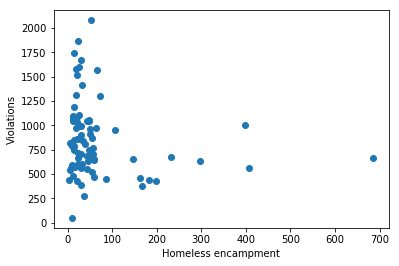

In [600]:
#Linear Model of Violations against Homeless Encampment Count Aggregated by precint
fig, ax = plt.subplots()
ax.scatter(prec_all["Homeless_Encampment_Count"],prec_all['Violation'])
pl.ylabel('Violations');
pl.xlabel("Homeless encampment");

**Figure 5.** Scatterplot of Homeless Encampments against Violations agreggating data by precinct.

It doesn't seem to be a correlation, but most of the data points are concentrated in one side.
A log scale is tryied to better visualize the data.

Anyway, note that some of the precincts with most encampments are the ones with lowest frequency of violations. 

In [610]:
lm_fel_pc = smf.ols(formula="np.log(Felonies)~np.log(Homeless_Encampment_Count)", data = prec_all).fit()
lm_fel_pc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Felonies)   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     5.440
Date:                Mon, 09 Oct 2017   Prob (F-statistic):             0.0224
Time:                        18:11:17   Log-Likelihood:                -56.823
No. Observations:                  77   AIC:                             117.6
Df Residuals:                      75   BIC:                             122.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             6.9540      0.213     32.572      0.000       6.529       7.379
np.log(Homeless_Encampment_Count)     0.1338      0.057      2.332      0.022       0.020       0.248
==============================================================================
Omnibus:                       57.990   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.590
Skew:                          -2.087   Prob(JB):                     1.55e-90
Kurtosis:                      13.559   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

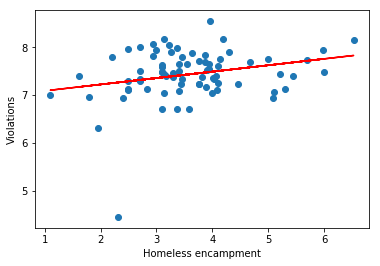

In [611]:
fig, ax = plt.subplots()
ax.scatter(np.log(prec_all["Homeless_Encampment_Count"]),np.log(prec_all['Felonies']))
plt.plot(np.log(prec_all["Homeless_Encampment_Count"]), np.log(prec_all["Homeless_Encampment_Count"])*lm_fel_pc.params[1] + lm_fel_pc.params[0],c="r")
pl.ylabel('Violations');
pl.xlabel("Homeless encampment");

**Figure 6.** Scatterplot and Linear Fit of Homeless Encampments against Violations agreggating data by precinct. Log Scale.
There is almost no correlation between this variables. 

#### Major crimes 
A final comparison was performed. The NYPD COMPSTAT has statistics for the seven major felonies per precinct.
The 2016 was obtained from the site and used for the following "analysis".

In [481]:
#Loading 7 major crimes dataset for 2016
df911_7=pd.read_csv("seven-major-felony-offenses-by-precinct-2016.csv")
df911_7.columns=["Precinct","Major_Total_7"]

In [482]:
#Merging with homeless couunt
prec_7=pd.merge(prec_home_c, df911_7, on="Precinct")
prec_7.head()

,Precinct,Homeless_Encampment_Count,Major_Total_7
0,1,232,1395
1,5,87,899
2,6,182,1388
3,7,23,823
4,9,406,1463


In [491]:
#Creating linear model with log scale
lm_7 = smf.ols(formula="np.log(Homeless_Encampment_Count)~np.log(Major_Total_7)", data = prec_7).fit()
lm_7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     np.log(Homeless_Encampment_Count)   R-squared:                       0.155
Model:                                           OLS   Adj. R-squared:                  0.143
Method:                                Least Squares   F-statistic:                     13.71
Date:                               Mon, 09 Oct 2017   Prob (F-statistic):           0.000406
Time:                                       14:05:22   Log-Likelihood:                -104.23
No. Observations:                                 77   AIC:                             212.5
Df Residuals:                                     75   BIC:                             217.2
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.8690      1.476     -1.266      0.209      -4.809       1.071
np.log(Major_Total_7)     0.7704      0.208      3.702      0.000       0.356       1.185
==============================================================================
Omnibus:                        2.841   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.459
Skew:                           0.438   Prob(JB):                        0.292
Kurtosis:                       3.022   Cond. No.                         98.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

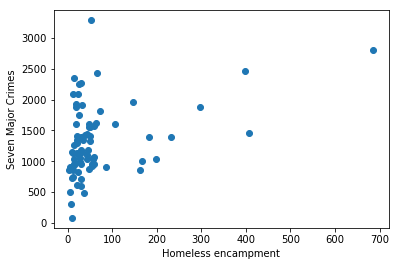

In [620]:
fig, ax = plt.subplots()
ax.scatter(prec_7["Homeless_Encampment_Count"],prec_7['Major_Total_7'])
pl.ylabel('Seven Major Crimes');
pl.xlabel("Homeless encampment");

**Figure 7.** Scatterplot of Homeless Encampments against 7 major crimes agreggating data by precinct. 

The pattern is similar to the other offenses, so to is the model with the log scale (not presented).

#### Carto Map

<img src="files/Homeless Encampment by Precint.png">

**Figure 8.** Homeless Encampments by Precinct

Link: https://jif245.carto.com/builder/6d99d550-e3a5-400c-bc70-3ed9c008d1f7/embed

#### Discussion.

No clear relation between Homeless Encampment and crime was found in this analysis. 
Most probable causes of this are the limitations of the analysis, another type of more granular spatial correlation should be tried, for example, by Census Tract or Community Borough. 

Nevertheless, there is also a limitation with the data, the Homeless Encampments are too few in some areas to establish a pattern or correlation. For this reason, it would be useful to include complaints about Homeless Person Assistance and analyze both type of complaints in conjunction.

Precinct 14 in Midtown Precinct South, was the one with the highest counts and an outlier of sorts. It also has one of the highest seven major crimes counts. 
One explanation for this, is that even if the amount of permanent residents in the area is small, the amount of tourist and everyday circulation makes it a hotspot for every type of crime and also, makes it more attractive to panhandler and homeless people. It should also be considered that once an area has a big concentration of homeless people, this could act as an atractor for more homeless people.

Further analysis could eliminate this type of outiliers from the data set. Both, crime count and Homeless Encampments are to hight to do a correct assessment.

Finally, other databases that could be included in further analysis could analyze other atractors of homeless people such as vacant buildings.




#### References.

*Cronley, C., Jeong, S., Davis, J. B., & Madden, E. (2015). Effects of Homelessness and Child Maltreatment on the Likelihood of Engaging in Property and Violent Crime During Adulthood. Journal of Human Behavior in the Social Environment, 25(3), 192-203. https://doi.org/10.1080/10911359.2014.966219

*Greg A. Greenberg, P. D., & Robert A. Rosenheck, M. D. (2008). Jail Incarceration, Homelessness, and Mental Health: A National Study. Psychiatric Services, 59(2), 170-177.

*Tyler, K. A., & Beal, M. R. (2010). The High-Risk Environment of Homeless Young Adults: Consequences for Physical and Sexual Victimization. Violence and Victims, 25(1), 101-115. https://doi.org/10.1891/0886-6708.25.1.101
